<a href="https://colab.research.google.com/github/CheronoK/Football-Analysis-IP/blob/master/Cherono_Independent_Project__Week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Football Analysis for MchezoPesa Ltd

## 1. Defining the Question

### a) Specifying the Question

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as  shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

### Approach 1: Polynomial approach

What to train given:

Rank of home team
Rank of away team
Tournament type

Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

### Approach 2: Logistic approach

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

### b) Defining the Metric for Success

The success of this analysis will be determined by :


*   Creating 2 models that predict goals for the home team and away team respectively 
*   Creating a model that figures out whether the home team wins, loses or draws



### c) Understanding the context 

The men's FIFA World Ranking is a ranking system for men's national teams in association football, currently led by Belgium. The teams of the men's member nations of FIFA, football's world governing body, are ranked based on their game results with the most successful teams being ranked highest. The rankings were introduced in December 1992, and eight teams (Argentina, Belgium, Brazil, France, Germany, Italy, the Netherlands and Spain) have held the top position, of which Brazil have spent the longest ranked first.

A points system is used, with points being awarded based on the results of all FIFA-recognised full international matches.

### d) Recording the Experimental Design

The following are the steps taken to implement the answer:
* Define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question.

* Perform EDA.
* Perform any necessary feature engineering.
* Check of multicollinearity.
* Start building the model.
* Cross-validate the model.
* Compute RMSE.
* Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test.
* Perform appropriate regressions on the data including your justification.
* Challenge your solution by providing insights on how you can make improvements.

### e) Data Relevance

The data provided is very relevant and widely covers the requirements of this particular analysis.

## 2. Reading the Data

Dataset ~ https://drive.google.com/file/d/1BYUqaEEnFtAe5lvzJh9lpVpR2MAvERUc/view

### a.) Importing Libraries

In [467]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

### b.) Loading the datasets

In [468]:
#Loading the ranks dataset
rank = pd.read_csv('fifa_ranking.csv')
rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [469]:
#Loading the results dataset
results = pd.read_csv('results.csv')
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


## 3. Checking the Data

### a.) Rank dataset

In [470]:
# Determining the no. of records in our dataset
rank.shape

(57793, 16)

The dataset has 57,793 rows and 16 columns.

In [471]:
# Previewing the top of our dataset
rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [472]:
# Previewing the bottom of our dataset
rank.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [473]:
#Checking for unique values in our dataset
rank.nunique()

rank                         209
country_full                 216
country_abrv                 216
total_points               11114
previous_points             1557
rank_change                  121
cur_year_avg                7419
cur_year_avg_weighted       7419
last_year_avg               7473
last_year_avg_weighted      7001
two_year_ago_avg            7575
two_year_ago_weighted       6513
three_year_ago_avg          7628
three_year_ago_weighted     5849
confederation                  6
rank_date                    286
dtype: int64

In [474]:
#Checking for null values in our dataset
rank.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

The dataset has no null values.

In [475]:
#Checking for duplicated rows
rank.duplicated().any()

True

The dataset has duplicated rows.

In [476]:
# Checking whether each column has an appropriate datatype
rank.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

### b.) Results dataset

In [477]:
# Determining the no. of records in our dataset
results.shape

(40839, 9)

The dataset has 40,839 rows and 9 columns.

In [478]:
# Previewing the top of our dataset
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [479]:
# Previewing the bottom of our dataset
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [480]:
#Checking for unique values in our dataset
results.nunique()

date          15115
home_team       309
away_team       306
home_score       26
away_score       22
tournament      109
city           1960
country         266
neutral           2
dtype: int64

In [481]:
#Checking for null values in our dataset
results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

The dataset has no null values.

In [482]:
#Checking for duplicated rows
results.duplicated().any()

False

The dataset has no duplicated rows.

In [483]:
# Checking whether each column has an appropriate datatype
results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

## 4. External Data Source Validation

According to the wikipedia world fifa ranking and the fifa.com website, the data is indeed correct and follows the ranking procedure in fifa.
The teams and games played are also accurrate.

## 5. Tidying the Dataset

### a.) Rank dataset

In [484]:
#Dropping duplicated rows
rank = rank.drop_duplicates()
rank.duplicated().any()

False

In [485]:
#Checking the shape after dropping duplicates
rank.shape

(57756, 16)

After removing duplicated rows, the dataset has 57,756 rows and 16 columns.

In [486]:
rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [487]:
##Dropping the columns that are not required
rank.drop(['country_abrv',	'total_points',	'previous_points',	'rank_change',	'cur_year_avg',	'cur_year_avg_weighted',	'last_year_avg',	'last_year_avg_weighted',	'two_year_ago_avg',	'two_year_ago_weighted',	'three_year_ago_avg',	'three_year_ago_weighted',	'confederation'], axis = 1, inplace = True)
rank.head()

,rank,country_full,rank_date
0,1,Germany,1993-08-08
1,2,Italy,1993-08-08
2,3,Switzerland,1993-08-08
3,4,Sweden,1993-08-08
4,5,Argentina,1993-08-08


### b.) Results dataset

In [488]:
#Selecting matches that only happened after the ranking system began i.e. in 1993-08-08
results1 = results[(results['date'] >= '1993-08-08')]
results1.shape

(22924, 9)

In [489]:
#Selecting matches that were only played at a neutral venue
results2 = results1[(results1['neutral'] == True)]
results2.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
17972,1993-09-22,Mexico,Cameroon,1,0,Friendly,Los Angeles,United States,True
17975,1993-09-22,San Marino,Netherlands,0,7,FIFA World Cup qualification,Bologna,Italy,True
17984,1993-09-29,Mexico,Poland,0,0,Friendly,Oakland,United States,True
17989,1993-10-06,Mexico,South Africa,4,0,Friendly,Los Angeles,United States,True
18009,1993-10-15,North Korea,Iraq,3,2,FIFA World Cup qualification,Doha,Qatar,True


In [490]:
#Dropping the city and neutral columns since they are not required
results2.drop(['city','neutral'], axis = 1, inplace = True)
results2.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,date,home_team,away_team,home_score,away_score,tournament,country
17972,1993-09-22,Mexico,Cameroon,1,0,Friendly,United States
17975,1993-09-22,San Marino,Netherlands,0,7,FIFA World Cup qualification,Italy
17984,1993-09-29,Mexico,Poland,0,0,Friendly,United States
17989,1993-10-06,Mexico,South Africa,4,0,Friendly,United States
18009,1993-10-15,North Korea,Iraq,3,2,FIFA World Cup qualification,Qatar


### c.) Merging dataset

In [491]:
#Renaming the country_full column to home_team to facilitate ease when merging
rank.rename(columns = {'country_full':'home_team', 'rank_date' : 'date'}, inplace = True)
rank.shape

(57756, 3)

In [492]:
#Merging the two datasets in order to get the rank of the home team
fifa1 = results2.merge(rank, how = 'inner', on  = ['home_team','date'])
fifa1.head()

,date,home_team,away_team,home_score,away_score,tournament,country,rank
0,1995-07-25,Antigua and Barbuda,French Guiana,2,1,CFU Caribbean Cup,Cayman Islands,145
1,1995-07-25,Iraq,Bulgaria,1,0,Merdeka Tournament,Malaysia,98
2,1995-08-22,Fiji,Vanuatu,3,1,South Pacific Games,French Polynesia,137
3,1995-08-22,Tahiti,Cook Islands,11,0,South Pacific Games,French Polynesia,157
4,1996-01-24,Angola,Cameroon,3,3,African Cup of Nations,South Africa,82


In [493]:
#Renaming the rank column of the merged dataset to home rank
fifa1.rename(columns = {'rank':'home_rank'}, inplace = True)
fifa1.shape

(158, 8)

In [494]:
#Getting the rank of the away team
#Renaming the home team which was named country to away team in order to get the away rank 
rank.rename(columns = {'home_team':'away_team'}, inplace = True)
rank.head()

,rank,away_team,date
0,1,Germany,1993-08-08
1,2,Italy,1993-08-08
2,3,Switzerland,1993-08-08
3,4,Sweden,1993-08-08
4,5,Argentina,1993-08-08


In [495]:
#Merging the results dataset and the new rank dataset in order to get the rank of the away team
fifa2 = results2.merge(rank, how = 'inner', on  = ['away_team','date'])
fifa2.head()

,date,home_team,away_team,home_score,away_score,tournament,country,rank
0,1993-10-22,Iran,Iraq,1,2,FIFA World Cup qualification,Qatar,64
1,1993-10-22,South Korea,Saudi Arabia,1,1,FIFA World Cup qualification,Qatar,46
2,1995-07-25,Iraq,Bulgaria,1,0,Merdeka Tournament,Malaysia,11
3,1995-08-22,Fiji,Vanuatu,3,1,South Pacific Games,French Polynesia,177
4,1996-01-24,Angola,Cameroon,3,3,African Cup of Nations,South Africa,32


In [496]:
#Renaming the rank column of the merged dataset to away rank
fifa2.rename(columns = {'rank':'away_rank'}, inplace = True)
fifa2.head()

,date,home_team,away_team,home_score,away_score,tournament,country,away_rank
0,1993-10-22,Iran,Iraq,1,2,FIFA World Cup qualification,Qatar,64
1,1993-10-22,South Korea,Saudi Arabia,1,1,FIFA World Cup qualification,Qatar,46
2,1995-07-25,Iraq,Bulgaria,1,0,Merdeka Tournament,Malaysia,11
3,1995-08-22,Fiji,Vanuatu,3,1,South Pacific Games,French Polynesia,177
4,1996-01-24,Angola,Cameroon,3,3,African Cup of Nations,South Africa,32


In [497]:
#Merging the merged dataset to have both the home team rank and the away team rank in one dataset
fifa3 = fifa1.merge(fifa2, how = 'inner', on  = ['date','home_team','away_team', 'tournament','home_score','away_score','country',])
fifa3.head()

,date,home_team,away_team,home_score,away_score,tournament,country,home_rank,away_rank
0,1995-07-25,Iraq,Bulgaria,1,0,Merdeka Tournament,Malaysia,98,11
1,1995-08-22,Fiji,Vanuatu,3,1,South Pacific Games,French Polynesia,137,177
2,1996-01-24,Angola,Cameroon,3,3,African Cup of Nations,South Africa,82,32
3,1996-01-24,Burkina Faso,Algeria,1,2,African Cup of Nations,South Africa,105,44
4,1996-01-24,Sierra Leone,Zambia,0,4,African Cup of Nations,South Africa,51,23


In [498]:
#Checking for null values in the new dataset
fifa3.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
country       0
home_rank     0
away_rank     0
dtype: int64

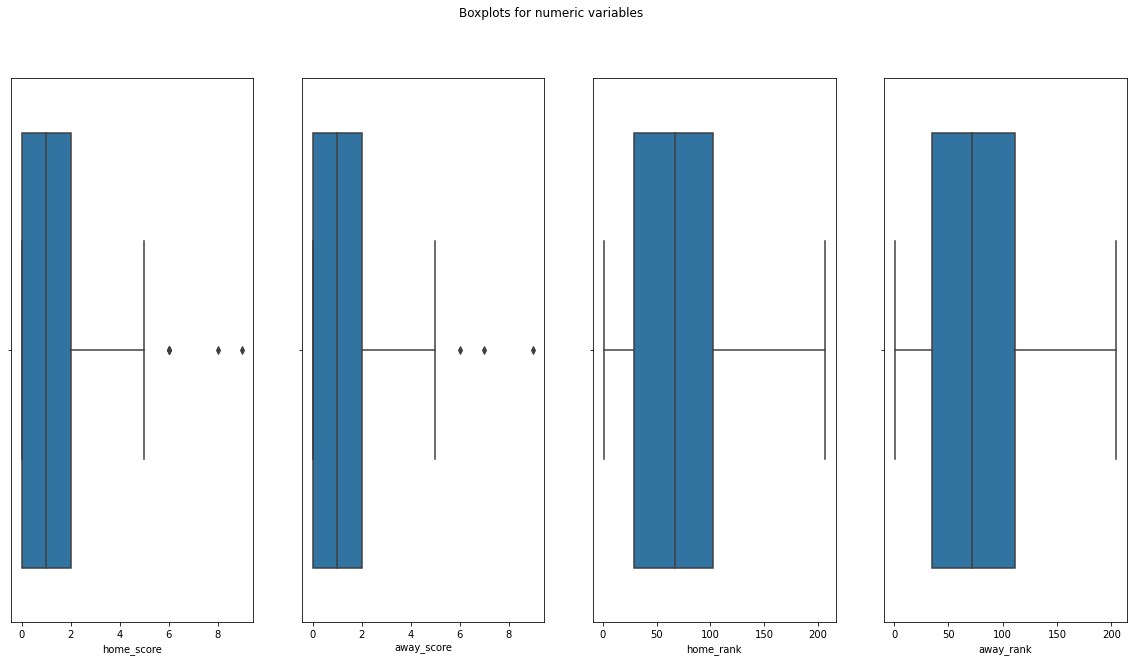

In [499]:
#checking for outliers
fig, ((ax1, ax2, ax3,ax4)) = plt.subplots(1,4, figsize=(20, 10))
fig.suptitle('Boxplots for numeric variables')
sns.boxplot(fifa3['home_score'], ax=ax1)
sns.boxplot(fifa3['away_score'], ax=ax2)
sns.boxplot(fifa3['home_rank'], ax=ax3)
sns.boxplot(fifa3['away_rank'], ax=ax4)
plt.show()

Outliers are present on the scores of both home teams and away teams. Removing these outliers would imply removing actual scores of teams. Therefore, these outliers will not be removed

## 6. Exploratory Analysis

In [500]:
#Checking statatical description of the dataset

fifa3.describe()

,home_score,away_score,home_rank,away_rank
count,138.000000,138.000000,138.000000,138.000000
mean,1.637681,1.239130,72.036232,78.384058
std,1.660806,1.432441,50.654319,51.670393
min,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,28.500000,35.250000
50%,1.000000,1.000000,67.000000,72.000000
75%,2.000000,2.000000,102.500000,111.000000
max,9.000000,9.000000,206.000000,204.000000


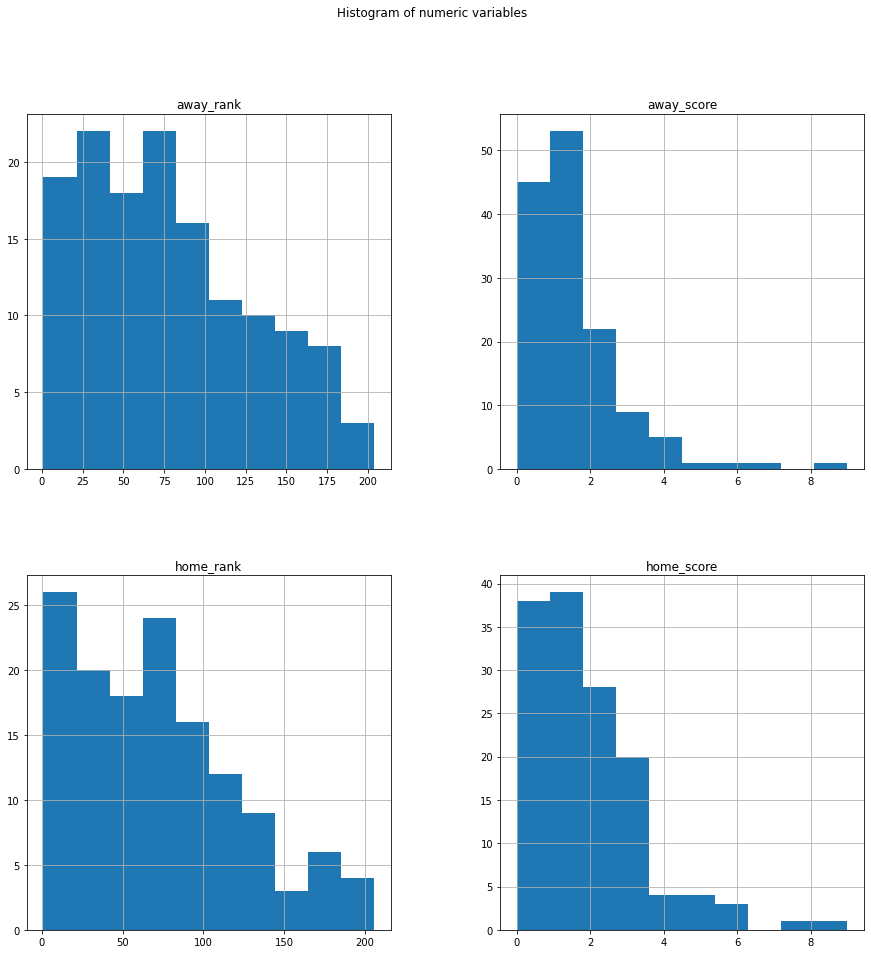

In [501]:
#Plotting the numerical variables on histogram to view their distributions.
fifa3.hist(bins=10, figsize=(15,15))
plt.suptitle("Histogram of numeric variables")
plt.savefig('Fifa Histogram')
plt.show()

The variables form a normal distribution and are all skewed to the right.

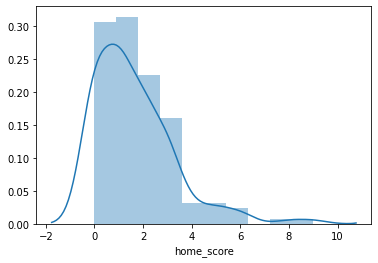

In [502]:
#Distribution plot for home scores
sns.distplot(fifa3['home_score'], bins=10) 

This shows that most of  the home score were 1 to 2 goals

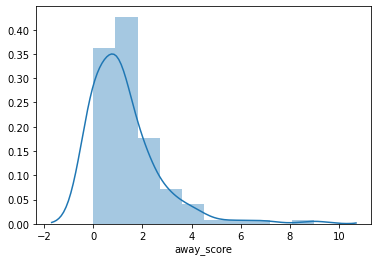

In [503]:
#Distribution plot for away scores
sns.distplot(fifa3['away_score'], bins=10) 

This shows that most of  the away scores were 0 to 2 goals

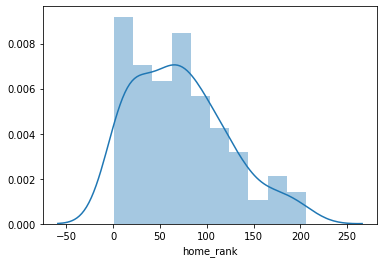

In [504]:
#Distribution plot for home rank
sns.distplot(fifa3['home_rank'], bins=10) 

Most home teams were ranked between 0 and 25

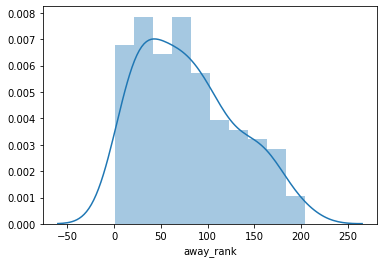

In [505]:
#Distribution plot for away rank
sns.distplot(fifa3['away_rank'], bins=10) 

Most away teams were ranked between 25 and 75

In [506]:
#Checking the correlations using correlation Matrix

CorrMatrix=fifa3.corr()
CorrMatrix   

,home_score,away_score,home_rank,away_rank
home_score,1.000000,-0.150475,-0.011730,0.334043
away_score,-0.150475,1.000000,0.357302,0.014825
home_rank,-0.011730,0.357302,1.000000,0.596499
away_rank,0.334043,0.014825,0.596499,1.000000


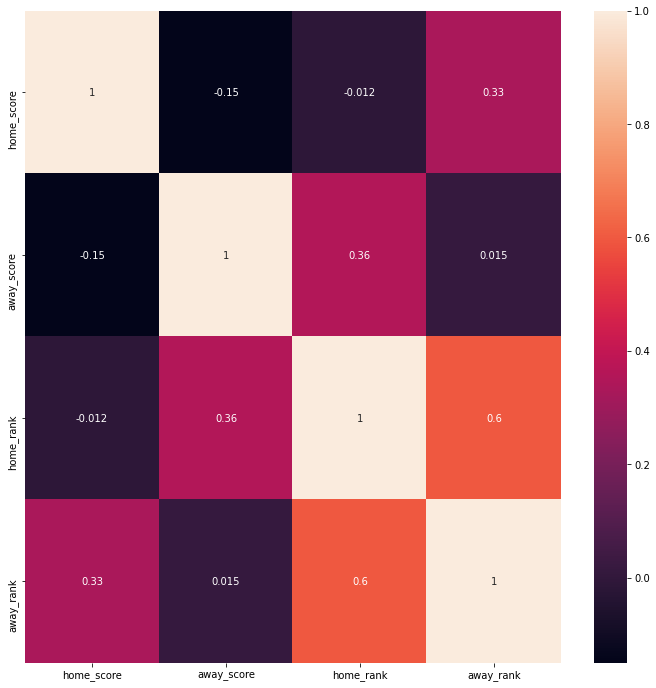

In [507]:
# Plotting visualisation of the matrix for better clarity 

plt.figure(figsize=(12, 12))  
sns.heatmap(CorrMatrix, annot = True) 

This shows the various correlations of the numerical variables. Home rank and away rank are strongly correlated

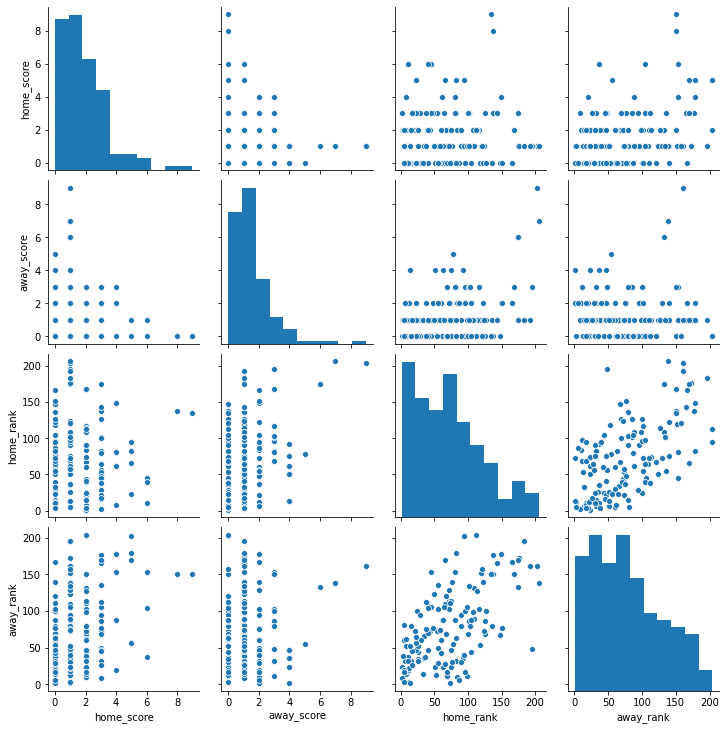

In [508]:
#Plotting pair plots

df = pd.DataFrame(fifa3, columns= ['home_score',	'away_score',	'home_rank',	'away_rank'])

sns.pairplot(df) 
plt.show()


Most of the variables are weakly correlated.

## 7. Implementing the Solution

### a.) Approach 1 : Polynomial Regression

#### Model 1: Predict how many goals the home team scores.

In [509]:
#Getting the required columns from the dataset
X = fifa3['home_rank'].values.reshape(-1,1)
y = fifa3['home_score'].values.reshape(-1,1)

In [510]:
#Splitting the dataset into train and test sets
X_train, y_train, X_test, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

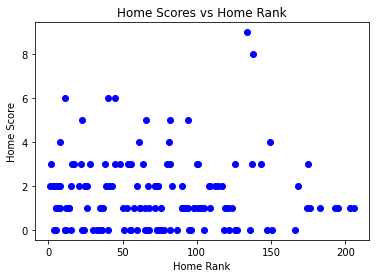

In [511]:
#Visualizing the dataset by plotting a scatter plot

plt.scatter(X, y, color='blue') 
plt.title('Home Scores vs Home Rank')
plt.xlabel('Home Rank')
plt.ylabel('Home Score')
plt.show()

The scatter plot depicts that the data is not linear, therefore, linear regression cannot be applied to this dataset.

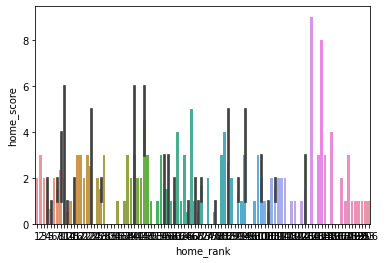

In [512]:
#Doing some manual prediction by  plotting a bar plot
sns.barplot(x= 'home_rank', y = 'home_score', data = fifa3)

Most of the home scores are 1 or 2 goals, therefore, 1 or 2 goals is the manual prediction of the number of goals the home team scores.

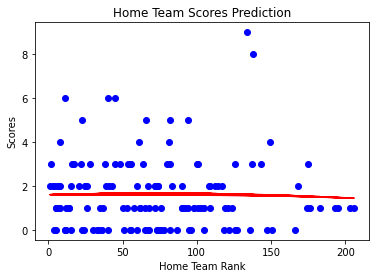

array([[1.61298718]])

In [513]:
#Performing polynomial regression
#Fitting polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualizing the Polynomial Regression results
plt.scatter(X, y, color='blue')
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Home Team Scores Prediction')
plt.xlabel('Home Team Rank')
plt.ylabel('Scores')
plt.show()
pol_reg.predict(poly_reg.fit_transform([[5.5]]))

The curve does not capture any data when a degree of 2 is used.

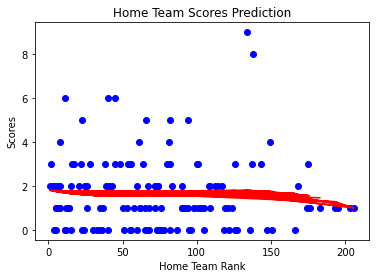

In [514]:
#Increasing the degree to 3

#Fitting polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 3) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualizing the Polynomial Regression results
plt.scatter(X, y, color='blue')
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Home Team Scores Prediction')
plt.xlabel('Home Team Rank')
plt.ylabel('Scores')
plt.show()

Using a degree of 3, the curve captures more datasets than a degree of 2.

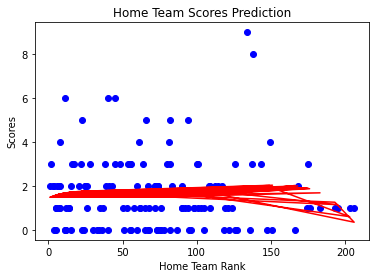

In [515]:
#Increasing the degree to 4

#Fitting polynomial Regression to the dataset
poly_reg4 = PolynomialFeatures(degree = 4) 
X_poly = poly_reg4.fit_transform(X)


pol_reg4 = LinearRegression()
pol_reg4.fit(X_poly, y)

#Visualizing the Polynomial Regression results
plt.scatter(X, y, color='blue')
plt.plot(X, pol_reg4.predict(X_poly), color='red')
plt.title('Home Team Scores Prediction')
plt.xlabel('Home Team Rank')
plt.ylabel('Scores')
plt.show()

However, the number of datasets the curve touches reduces when a degree of 4 is used.

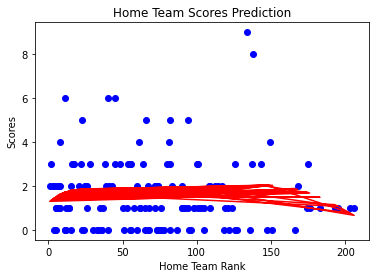

In [516]:
#Increasing the degree to 5

#Fitting polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 5) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualizing the Polynomial Regression results
plt.scatter(X, y, color='blue')
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Home Team Scores Prediction')
plt.xlabel('Home Team Rank')
plt.ylabel('Scores')
plt.show()

A degree of 5 results to the curve touching more datasets. Therefore, a degree of 4 is more suitable for this fitting.

In [517]:
#Predicting using Polynomial Regression
poly_pred = pol_reg4.predict(poly_reg4.fit_transform([[6.5]]))
print('Polynomial prediction: %d' %poly_pred)

Polynomial prediction: 1


This prediction predicts that the home team scores 1 goal.

#### Model 2: Predict how many goals the away team scores.**

In [518]:
#Getting the required columns from the dataset
X = fifa3['away_rank'].values.reshape(-1, 1)
y = fifa3['away_score'].values

In [519]:
#Splitting the dataset into train and test sets
X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

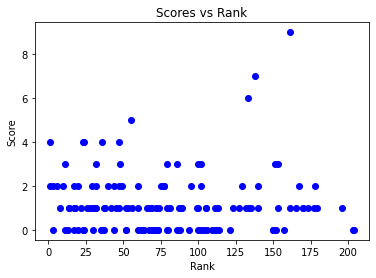

In [520]:
#Visualizing the dataset by plotting a scatter plot

plt.scatter(X, y, color='blue') 
plt.title('Scores vs Rank')
plt.xlabel('Rank')
plt.ylabel('Score')
plt.show()

The scatter plot depicts that the data is not linear, therefore, linear regression cannot be applied to this dataset.

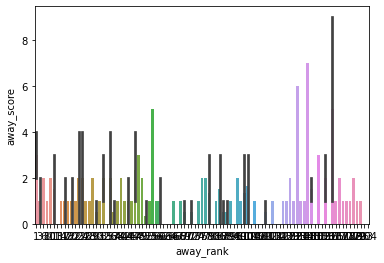

In [521]:
#Doing some manual prediction by  plotting a bar plot
sns.barplot(x= 'away_rank', y = 'away_score', data = fifa3)

Most of the away teams score 1 goal, therefore, 1 goal is the manual prediction of the number of goals an away team scores.

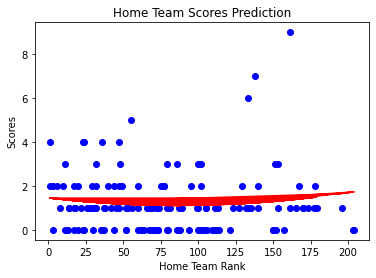

array([[1.52680727]])

In [522]:
#Performing polynomial regression
#Fitting polynomial Regression to the dataset
poly_reg2 = PolynomialFeatures(degree = 2) 
X_poly = poly_reg2.fit_transform(X)


pol_reg2 = LinearRegression()
pol_reg2.fit(X_poly, y)

#Visualizing the Polynomial Regression results
plt.scatter(X, y, color='blue')
plt.plot(X, pol_reg2.predict(X_poly), color='red')
plt.title('Home Team Scores Prediction')
plt.xlabel('Home Team Rank')
plt.ylabel('Scores')
plt.show()
pol_reg.predict(poly_reg.fit_transform([[5.5]]))

The curve captures  quite a number of data when a degree of 2 is used.

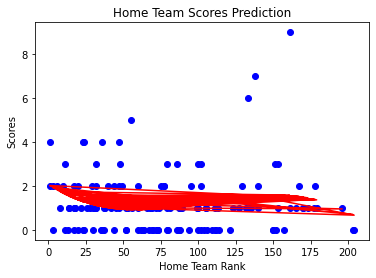

In [523]:
#Increasing the degree to 3

#Fitting polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 3) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualizing the Polynomial Regression results
plt.scatter(X, y, color='blue')
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Home Team Scores Prediction')
plt.xlabel('Home Team Rank')
plt.ylabel('Scores')
plt.show()

The curve capture a lot of datasets with a degree of 3, therefore a degree of 2 is suitable to prevent overfitting. 

In [524]:
#Predicting using Polynomial Regression
poly_pred = pol_reg2.predict(poly_reg2.fit_transform([[6.5]]))
print('Polynomial prediction: %d' %poly_pred)

Polynomial prediction: 1


This prediction predicts that the away team scores 1 goal.

### a.) Approach 2 : Linear Regression

#### Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

#### i.) Feature Engineering

In [525]:
#Creating a status column to indicate whether it's a win, lose or draw for the home team

#Creating a goals column to indicate the difference of home score and away score
fifa3['goals'] = fifa3['home_score'] - fifa3['away_score']

#Defining a function that will allocate the win, loss or draw
def home_team(goals):
    if goals > 0:
        return 'Win'
    elif goals < 0:
        return 'Lose'
    else:
        return 'Draw'
#Calling the function
fifa3['status'] = fifa3.goals.apply(lambda i: home_team(i))
fifa3.head()

,date,home_team,away_team,home_score,away_score,tournament,country,home_rank,away_rank,goals,status
0,1995-07-25,Iraq,Bulgaria,1,0,Merdeka Tournament,Malaysia,98,11,1,Win
1,1995-08-22,Fiji,Vanuatu,3,1,South Pacific Games,French Polynesia,137,177,2,Win
2,1996-01-24,Angola,Cameroon,3,3,African Cup of Nations,South Africa,82,32,0,Draw
3,1996-01-24,Burkina Faso,Algeria,1,2,African Cup of Nations,South Africa,105,44,-1,Lose
4,1996-01-24,Sierra Leone,Zambia,0,4,African Cup of Nations,South Africa,51,23,-4,Lose


In [526]:
#Encoding categorical features using label encoder
#Importing labelencoder
from sklearn.preprocessing import LabelEncoder
#Instantiating labelencoder object
le = LabelEncoder()
fifa4 = fifa3.apply(le.fit_transform)
fifa4.head()

,date,home_team,away_team,home_score,away_score,tournament,country,home_rank,away_rank,goals,status
0,0,31,8,1,0,18,21,65,5,8,2
1,1,24,78,3,1,24,13,84,89,9,2
2,2,4,11,3,3,3,34,57,19,7,0
3,2,13,0,1,2,3,34,69,26,6,1
4,2,61,81,0,4,3,34,35,12,3,1


In [527]:
#Checking statatical description of the dataset
fifa4.describe()

,date,home_team,away_team,home_score,away_score,tournament,country,home_rank,away_rank,goals,status
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,38.471014,35.304348,39.297101,1.623188,1.231884,11.666667,28.449275,45.956522,44.050725,7.391304,1.217391
std,19.230523,20.180430,23.183939,1.603841,1.394933,4.644019,14.991517,28.142979,27.050729,2.277900,0.808162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.250000,19.250000,20.000000,0.000000,0.000000,11.000000,12.250000,20.250000,20.250000,6.000000,1.000000
50%,41.000000,36.000000,38.500000,1.000000,1.000000,12.000000,30.000000,47.000000,44.000000,7.000000,1.000000
75%,54.000000,48.000000,58.750000,2.000000,2.000000,12.000000,45.000000,67.750000,65.000000,9.000000,2.000000
max,71.000000,77.000000,81.000000,8.000000,8.000000,27.000000,46.000000,99.000000,94.000000,15.000000,2.000000


#### ii.) Detecting Multicollinearity

In [528]:
#Understanding how the independent variables are correlated

#Removing the date,country,tournament and status columns, in order to focus on the independent variables
independent_only = fifa4.drop(columns=['date','country','status'])

#Displaying the correlations between the variables
correlations = independent_only.corr()
correlations

,home_team,away_team,home_score,away_score,tournament,home_rank,away_rank,goals
home_team,1.000000,0.107533,0.089493,-0.169512,-0.166441,-0.116418,0.059326,0.166816
away_team,0.107533,1.000000,-0.141644,0.132148,-0.038191,0.046301,0.040037,-0.180654
home_score,0.089493,-0.141644,1.000000,-0.149891,-0.077746,-0.015567,0.316910,0.795877
away_score,-0.169512,0.132148,-0.149891,1.000000,0.008639,0.301098,-0.000507,-0.717913
tournament,-0.166441,-0.038191,-0.077746,0.008639,1.000000,0.013627,0.011698,-0.060030
home_rank,-0.116418,0.046301,-0.015567,0.301098,0.013627,1.000000,0.577300,-0.195346
away_rank,0.059326,0.040037,0.316910,-0.000507,0.011698,0.577300,1.000000,0.223443
goals,0.166816,-0.180654,0.795877,-0.717913,-0.060030,-0.195346,0.223443,1.000000


The table above shows that each variable relates to another.

In [529]:
#Using these correlations to compute the VIF score for each variable.
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,home_team,away_team,home_score,away_score,tournament,home_rank,away_rank,goals
home_team,1.100811,-0.137371,1.799456e-02,9.706812e-02,0.173688,0.176805,-0.153963,-6.913624e-02
away_team,-0.137371,1.064766,8.694284e-02,-6.718310e-02,0.034081,0.055580,-0.125117,1.343662e-01
home_score,0.023876,0.074401,-1.860508e+14,1.618168e+14,0.042526,0.187152,-0.324973,2.642440e+14
away_score,0.097413,-0.058946,1.618168e+14,-1.407394e+14,0.065726,-0.365018,0.033144,-2.298249e+14
tournament,0.173688,0.034081,4.378546e-02,6.463129e-02,1.038142,0.049923,-0.084272,7.963690e-02
home_rank,0.176805,0.055580,1.964735e-01,-3.731248e-01,0.049923,1.855750,-1.188968,1.874838e-01
away_rank,-0.153963,-0.125117,-3.526672e-01,5.723125e-02,-0.084272,-1.188968,1.888018,-3.343365e-01
goals,-0.078151,0.154597,2.642440e+14,-2.298249e+14,0.081425,0.200723,-0.373670,-3.753000e+14


The VIF scores range between 1.8 and -3.75. None of the VIF scores are above 5 hence we can't remove any of the variables to improve the VIF scores.

#### iii.) Building the model

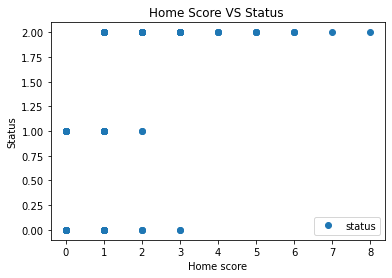

In [530]:
#Visualizing the relationship between home score and status

#Plotting a scatter plot
fifa4.plot(x='home_score', y='status', style='o')
plt.title('Home Score VS Status ')
plt.xlabel('Home score')
plt.ylabel('Status')
plt.show()

The scatter plots depict a weak correlation of these two variables.

In [531]:
#Building a linear regression model

#Setting up the training and test sets
from sklearn.model_selection import train_test_split

X = fifa4.values
y = fifa4['status'].values

#20% of the data will be used as test, the rest will be the training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [532]:
#creating a regressor object, and train it using the train data
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train, y_train)

#display the intercept / bias
print(regressor.intercept_)

#display the coefficient
print(regressor.coef_)

3.197442310920451e-14
[ 1.35005791e-17 -2.94902991e-17  3.13334428e-17  4.81811314e-15
 -4.02290506e-15 -2.60208521e-18 -3.92481186e-17 -1.73472348e-17
 -1.64798730e-17 -4.46452771e-15  1.00000000e+00]


In [533]:
#Feed the model the data saved for testing.
y_predict = regressor.predict(X_test)

#We will have the model predict the status based on the home scores set aside
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predict.flatten()})

#Comparing that to the actual status from the original dataset.
comparison_frame.describe()

,Actual,Predicted
count,28.000000,2.800000e+01
mean,1.428571,1.428571e+00
std,0.741798,7.417982e-01
min,0.000000,-2.338601e-15
25%,1.000000,1.000000e+00
50%,2.000000,2.000000e+00
75%,2.000000,2.000000e+00
max,2.000000,2.000000e+00


The model accurately predicts most values except the min hence it's not a bad model.

In [534]:
#Calculating the metrics for linear regression
from sklearn import metrics

#The first metric is MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))

#The second is MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  

#Finally, the RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))  

Mean Absolute Error: 1.1680785844647463e-15
Mean Squared Error: 1.7644854397485493e-30
Root Mean Squared Error: 1.3283393541367918e-15


An RMSE of 1.3283393541367918e-15 is acceptable as it is less than 10% of the mean of the dependent variable(status) which is 1.369565

#### iv.) Cross_Validating the model

In [535]:
#Using k-fold cross-validation with 5 folds
from sklearn.model_selection import KFold

#Using the independent variables for this
X = fifa4.values
y = fifa4['status'].values

folds = KFold(n_splits=5)

#Using get_n_splits to figure out how many folds is set up
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

#Creating and assessing 5 models based on the folds created.
RMSES = [] #Using this array to keep track of the RSME of each model
count = 1
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  #Setting up the train and test based on the split determined by KFold
  #With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  #Fitting a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  #Assessing the accuracy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 1.1206361772999182e-15

Training model 2
Model 2 Root Mean Squared Error: 1.2513419048884276e-15

Training model 3
Model 3 Root Mean Squared Error: 1.6844823245958365e-15

Training model 4
Model 4 Root Mean Squared Error: 1.1311728836156352e-15

Training model 5
Model 5 Root Mean Squared Error: 1.7810922298580953e-15


The RMSEs acquired have a slight difference with the previously acquired RMSE. The 1st, 2nd and 4th model have smaller RMSE.

In [536]:
#Computing the avergae RMSE of all the models
np.mean(RMSES)

1.3937451040515824e-15

The average RMSE is almost the same as the initial RMSE.

Performing a variant of k-fold, Leave One Out Cross Validation(LOOCV)

In [537]:
from sklearn.model_selection import LeaveOneOut

#Using the same independent variables for this
X = fifa4.values
y = fifa4['status'].values

folds = LeaveOneOut()

#Using get_n_splits to figure out how many folds is set up
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

#Creating and assessing 5 models based on the folds created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 0 
for train_index, test_index in folds.split(X):
  
  #Setting up the train and test based on the split determined by KFold
  #With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  #Fitting a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  #Assessing the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  count = count + 1
print('trained ' + str(count) + ' models' )
np.mean(RMSES)

we are using 138 folds
trained 138 models


1.4404121919186753e-15

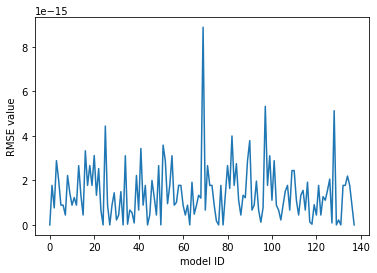

In [538]:
import matplotlib.pyplot as plt

plt.plot(RMSES)
plt.ylabel('RMSE value')
plt.xlabel('model ID')
plt.show()

This indicates that it would be challenging to create a model that beats the  1.3283393541367918e-15 average RMSE using this dataset.

#### v.) Residual plots and heteroskedasticity testing

In [539]:
#Creating the residual by substracting the test value from the predicted value for each row in our dataset

residuals = np.subtract(y_predict, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

0.42857142857142805

This mean is close to 0, indicating that we tend to be correct and over estimating chances by, on average, 42.85%

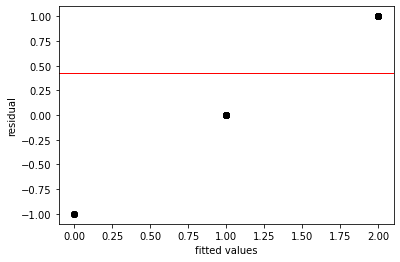

In [540]:
import matplotlib.pyplot as plt

plt.scatter(y_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

This looks too bad:the residuals are not centered around a mean and there are no obvious patterns. However performing a heteroskedasticity test will be more thorough.

In [541]:
#Performing a heteroskedasticity test
#Using bartlett's test to establish a null hypothesis that the variance is equal for all the datapoints,
#and the new hypothesis that the variance is different for at least one pair of datapoints.
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_predict, residuals)

#Computing a critical value of the chi squared distribution  to interpret the results
degree_of_freedom = len(y_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(p_value)

#If the test_result is greater than the critical value, then we reject our null
#hypothesis. This would mean that there are patterns to the variance of the data

#Otherwise, we can identify no patterns, and we accept the null hypothesis that 
#the variance is homogeneous across our data

if (test_result > critical_value):
  print('The variances are unequal, and the model should be reassessed')
else:
  print('The variances are homogeneous!')

1.0
The variances are homogeneous!


The variances are homogeneous hence no patterns can be identified in the dataset

## 8. Challenging the solution

Better Results would have been achieved if outliers were not present while creating the models.

In addition, having a larger dataset after merging and cleaning would have helped in achieving better results.

## 9. Follow up questions

### a). Did we have the right data?

Yes, we had the right data to answer the questions given and perform accuarate analysis.

### b). Do we need other data to answer our question?

No, the data provided covers the requirements of the question.

### c). Did we have the right question?
Yes, we had the right question and it is very relevant.